In [1]:
from datetime import datetime
import time
import os
from tqdm import tqdm
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
bug_df = pd.read_csv('./bug/so details.txt')
bug_df.info()
bug_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CreationDate   3636 non-null   object 
 1   Title          3636 non-null   object 
 2   Tags           3636 non-null   object 
 3   Score          3636 non-null   int64  
 4   AnswerCount    3636 non-null   int64  
 5   CommentCount   3636 non-null   int64  
 6   FavoriteCount  702 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 199.0+ KB


,CreationDate,Title,Tags,Score,AnswerCount,CommentCount,FavoriteCount
0,2012-07-10T14:09:47.123,How to enable the Java keyword assert in Eclip...,java eclipse assert assertions,64,6,1,8.0
1,2012-10-08T12:46:21.523,Stack program in Java without using built-in c...,java data-structures,0,3,4,NaN


In [3]:
non_bug_df = pd.read_csv('./non_bug/so details.txt')
non_bug_df.info()
non_bug_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17986 entries, 0 to 17985
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CreationDate   17986 non-null  object 
 1   Title          17986 non-null  object 
 2   Tags           17986 non-null  object 
 3   Score          17986 non-null  int64  
 4   AnswerCount    17986 non-null  int64  
 5   CommentCount   17986 non-null  int64  
 6   FavoriteCount  3427 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 983.7+ KB


,CreationDate,Title,Tags,Score,AnswerCount,CommentCount,FavoriteCount
0,2018-08-06T01:49:50.053,Inconsistency in Java's compareTo method on St...,java comparator,0,0,3,NaN
1,2018-08-06T01:49:50.053,Inconsistency in Java's compareTo method on St...,java comparator,0,0,3,NaN


In [4]:
df_list = [bug_df, non_bug_df]
for tf in df_list:
    tf['CreationDate'] = tf['CreationDate'].apply(lambda x:x[:4])

In [5]:
bug_time = bug_df['CreationDate'].value_counts()
bug_time

2018    541
2016    503
2017    499
2015    414
2014    387
2013    344
2019    286
2020    271
2012    230
2011     83
2010     63
2009     13
2008      2
Name: CreationDate, dtype: int64

In [6]:
non_bug_time = non_bug_df['CreationDate'].value_counts()
non_bug_time

2018    3161
2015    2428
2016    2333
2017    2090
2014    1887
2013    1591
2019    1422
2020    1329
2012     867
2011     463
2010     276
2009      88
2008      51
Name: CreationDate, dtype: int64

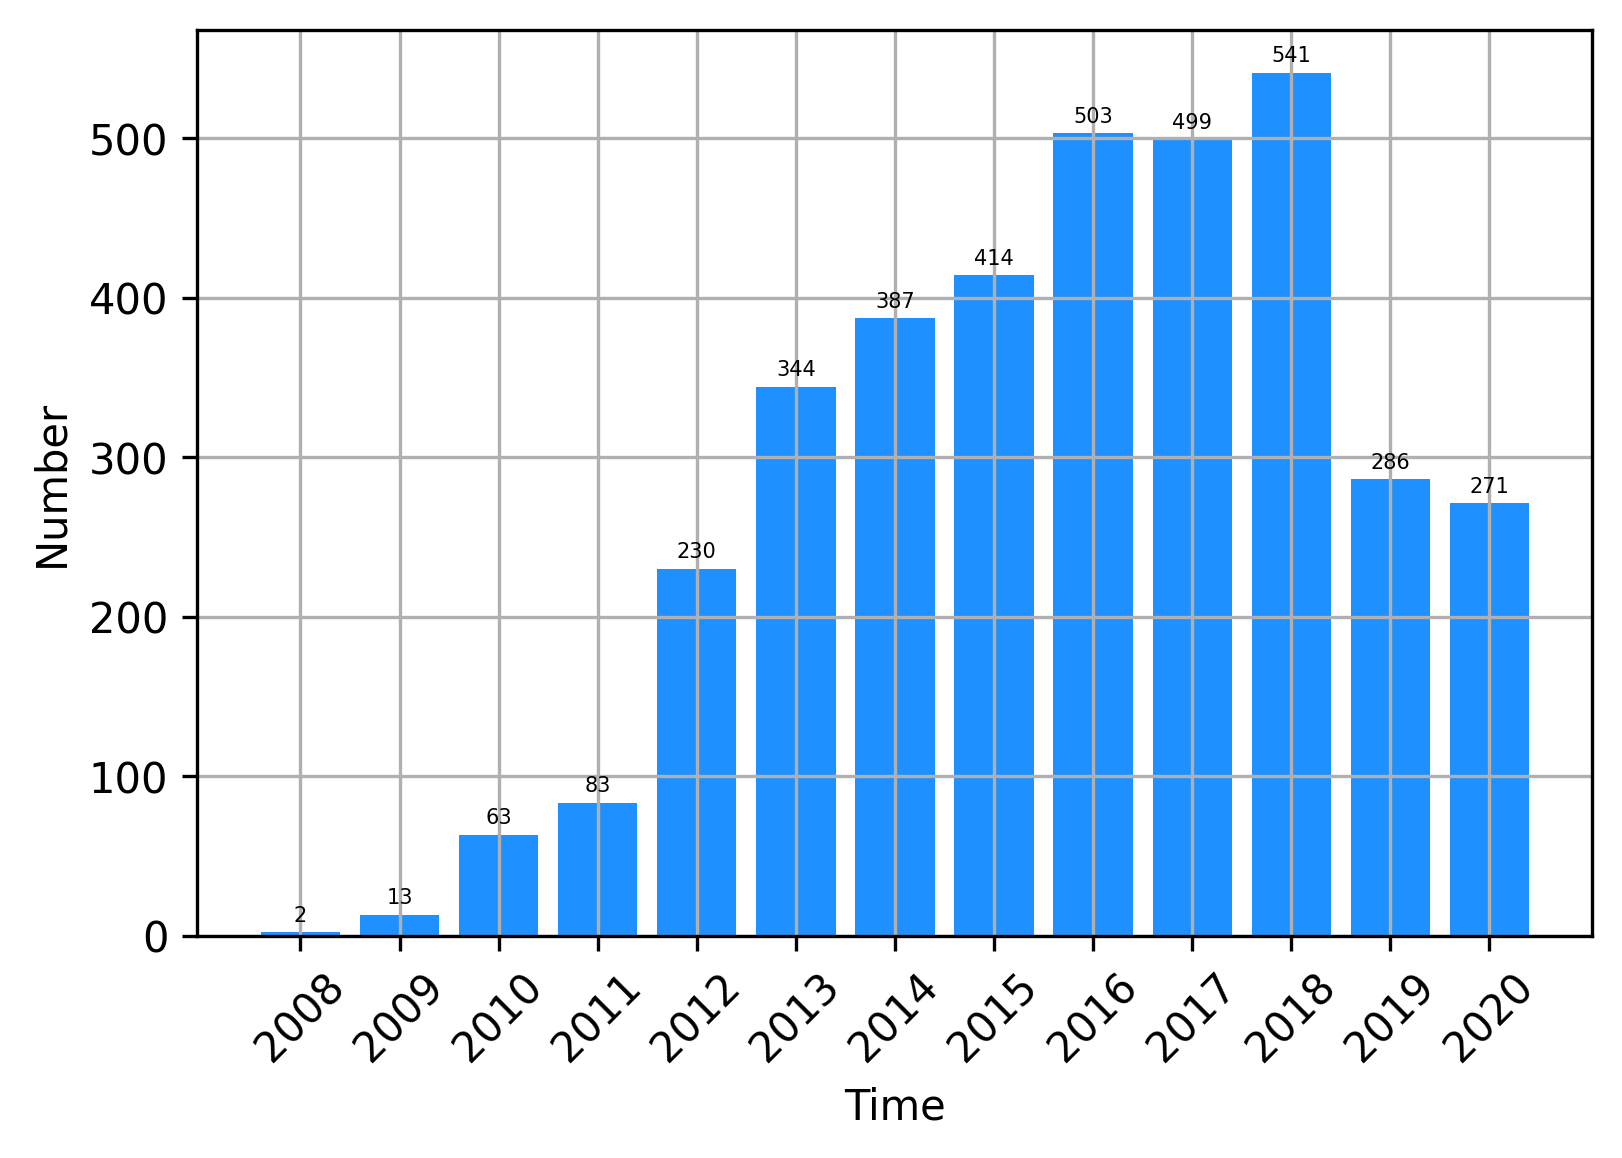

In [11]:
# data
import matplotlib.pyplot as plt
x = [i for i in range(len(bug_time))]
y = [bug_time.loc[str(i)] for i in range(2008, 2021)]
plt.figure(dpi=300)
# draw

plt.bar(x,y,align="center",color="#1E90FF",tick_label=[i for i in range(2008,2021)],alpha=1.0)
for a,b,i in zip(x,y,range(len(x))):
    plt.text(a,b+7,str(y[i]),ha='center',fontsize=5)
plt.xlabel("Time")
plt.ylabel("Number")
plt.xticks(rotation=45)
plt.grid()
plt.savefig('./pic/non_bug_so_time.jpg',bbox_inches = 'tight')

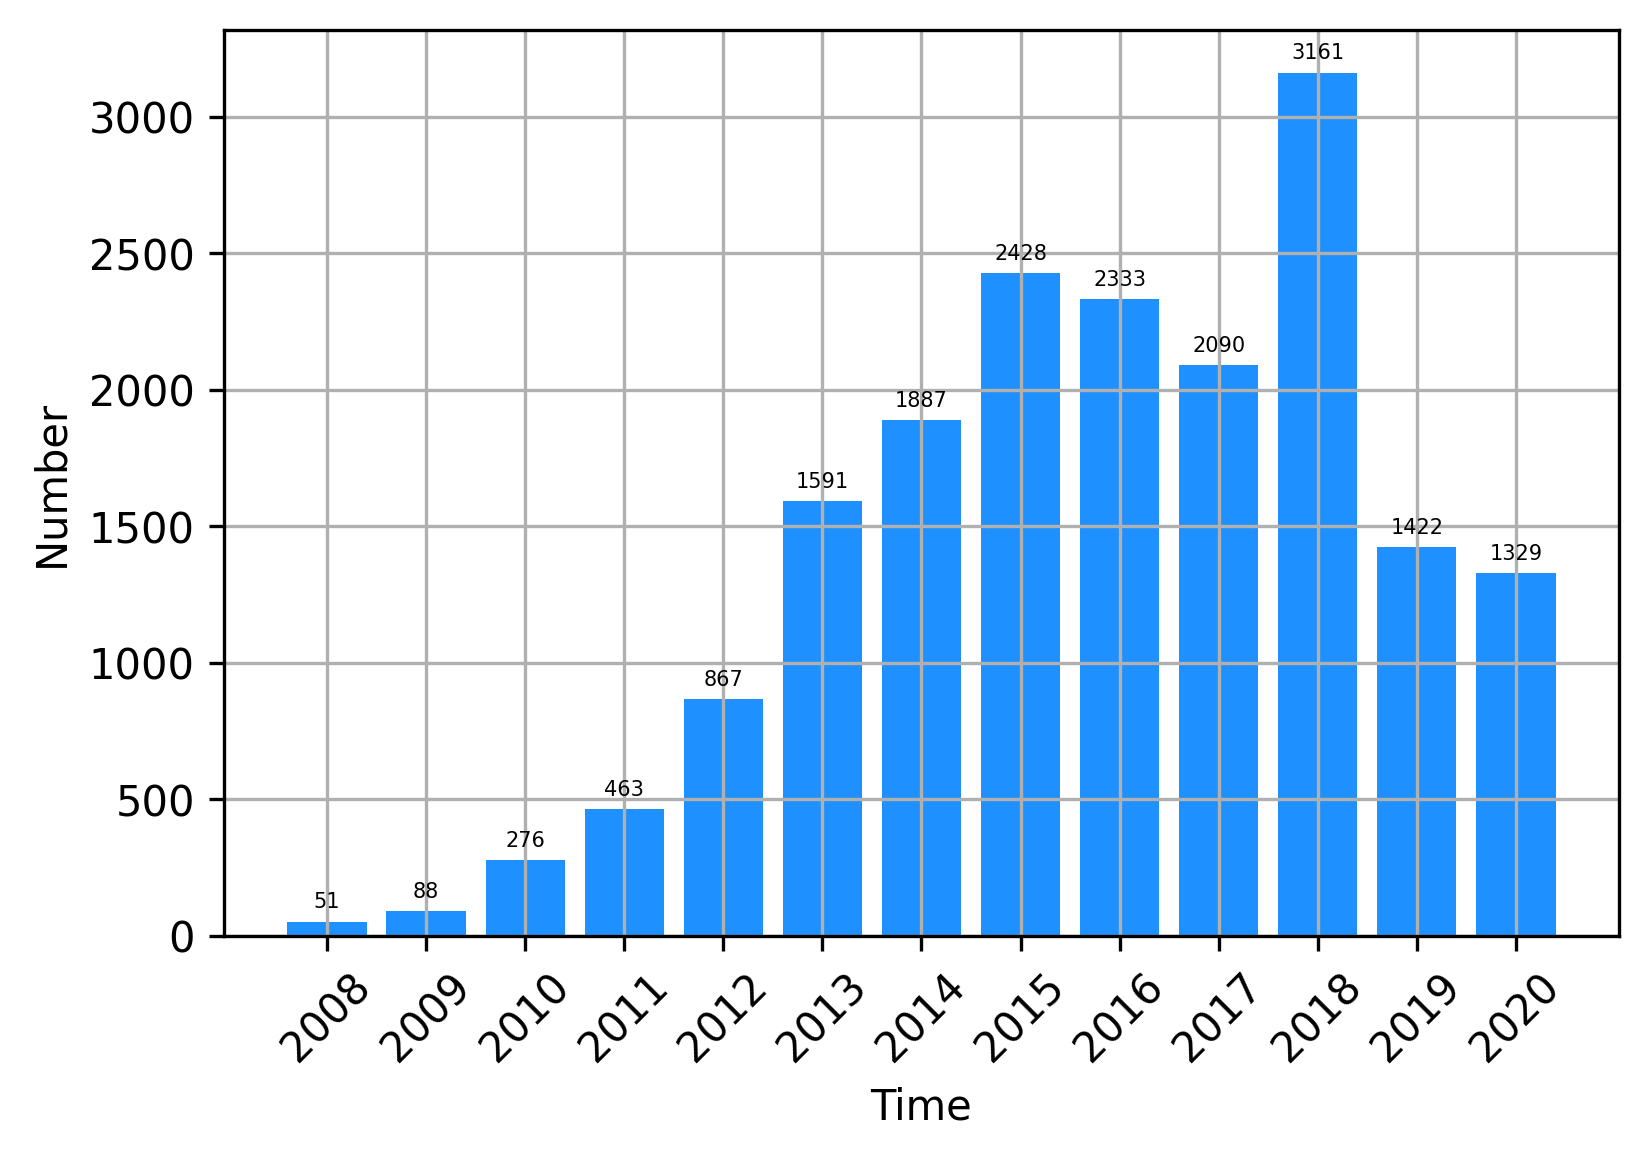

In [13]:
# data
import matplotlib.pyplot as plt
x = [i for i in range(len(non_bug_time))]
y = [non_bug_time.loc[str(i)] for i in range(2008, 2021)]
plt.figure(dpi=300)
# draw

plt.bar(x,y,align="center",color="#1E90FF",tick_label=[i for i in range(2008,2021)],alpha=1.0)
for a,b,i in zip(x,y,range(len(x))):
    plt.text(a,b+50,str(y[i]),ha='center',fontsize=5)
plt.xlabel("Time")
plt.ylabel("Number")
plt.xticks(rotation=45)
plt.grid()
plt.savefig('./pic/non_bug_so_time.jpg',bbox_inches = 'tight')
